<a href="https://colab.research.google.com/github/vitorscience/Data-Science/blob/main/Analise%20de%20dados%20Atenas%20Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Atenas*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Atenas, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um DataFrame cidade Athens, Attica, Greece

df = pd.read_csv('listings.csv')

In [8]:
df.shape

(13182, 18)

In [9]:
df_analise = df.copy()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13182 entries, 0 to 13181
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13182 non-null  int64  
 1   name                            13182 non-null  object 
 2   host_id                         13182 non-null  int64  
 3   host_name                       13182 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   13182 non-null  object 
 6   latitude                        13182 non-null  float64
 7   longitude                       13182 non-null  float64
 8   room_type                       13182 non-null  object 
 9   price                           12816 non-null  float64
 10  minimum_nights                  13182 non-null  int64  
 11  number_of_reviews               13182 non-null  int64  
 12  last_review                     

## Análise dos Dados


**Dicionário das variáveis**

* id - Número de indentificação do imóvel                         
* name - Nome do imóvel
* host_id - id do proprietario
* host_name - id do solicitante
* neighbourhood_group
* neighbourhood - nome do bairro
* latitude - cordenada geográfica do imóvel
* longitude - cordenada geográfica do imóvel
* room_type - tipo do imóvel
* price -  preço do imóvel
* minimum_nights - Mínimo de noites para alugar
* number_of_reviews - número de reviews do imóvel
* last_review - Ultima review
* reviews_per_month - Reviews por mês do imóvel
* calculated_host_listings_count - Listagem de anfitriões
* availability_365 - disponibilidade anual
* number_of_reviews_ltm
* license - número da licença




In [28]:
# mostrar as 5 primeiras entradas
df_analise.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,10595,Condo in Athens · ★4.84 · 3 bedrooms · 5 beds ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,93.0,1,45,2023-10-23,0.29,7,351,11,00000957568
1,10990,Rental unit in Athens · ★4.81 · 1 bedroom · 1 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,41.0,1,71,2023-12-22,0.52,7,343,8,00001070920
2,10993,Rental unit in Athens · ★4.83 · Studio · 2 bed...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98888,23.76473,Entire home/apt,42.0,1,93,2023-11-13,0.68,7,353,6,00000957080
3,10995,Rental unit in Athens · ★4.80 · 1 bedroom · 2 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,48.0,1,30,2023-06-02,0.18,7,358,1,00000957422
4,27262,Rental unit in Athens · ★4.83 · 1 bedroom · 1 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98924,23.76500,Entire home/apt,48.0,1,23,2023-12-02,0.17,7,360,4,00000957579


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [65]:
# identificar o volume de dados do DataFrame
df_analise.shape
# verificar as 5 primeiras entradas do dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,10595,Condo in Athens · ★4.84 · 3 bedrooms · 5 beds ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,93.0,1,45,2023-10-23,0.29,7,351,11,00000957568
1,10990,Rental unit in Athens · ★4.81 · 1 bedroom · 1 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,41.0,1,71,2023-12-22,0.52,7,343,8,00001070920
2,10993,Rental unit in Athens · ★4.83 · Studio · 2 bed...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98888,23.76473,Entire home/apt,42.0,1,93,2023-11-13,0.68,7,353,6,00000957080
3,10995,Rental unit in Athens · ★4.80 · 1 bedroom · 2 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,48.0,1,30,2023-06-02,0.18,7,358,1,00000957422
4,27262,Rental unit in Athens · ★4.83 · 1 bedroom · 1 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98924,23.76500,Entire home/apt,48.0,1,23,2023-12-02,0.17,7,360,4,00000957579


In [79]:
#número de ids
numero_valores_unicos = df_analise['id'].nunique()
numero_valores_unicos

13182

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [13]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
df_nulos = df_analise.isnull().sum()/df.shape[0]
df_nulos

id                                0.000000
name                              0.000000
host_id                           0.000000
host_name                         0.000000
neighbourhood_group               1.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.027765
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.160370
reviews_per_month                 0.160370
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
license                           0.050144
dtype: float64

In [16]:
for variable, percent in df_nulos.items():
    print(f'A variável "{variable}" possui {percent:.2%} de valores nulos.')

A variável "id" possui 0.00% de valores nulos.
A variável "name" possui 0.00% de valores nulos.
A variável "host_id" possui 0.00% de valores nulos.
A variável "host_name" possui 0.00% de valores nulos.
A variável "neighbourhood_group" possui 100.00% de valores nulos.
A variável "neighbourhood" possui 0.00% de valores nulos.
A variável "latitude" possui 0.00% de valores nulos.
A variável "longitude" possui 0.00% de valores nulos.
A variável "room_type" possui 0.00% de valores nulos.
A variável "price" possui 2.78% de valores nulos.
A variável "minimum_nights" possui 0.00% de valores nulos.
A variável "number_of_reviews" possui 0.00% de valores nulos.
A variável "last_review" possui 16.04% de valores nulos.
A variável "reviews_per_month" possui 16.04% de valores nulos.
A variável "calculated_host_listings_count" possui 0.00% de valores nulos.
A variável "availability_365" possui 0.00% de valores nulos.
A variável "number_of_reviews_ltm" possui 0.00% de valores nulos.
A variável "license"

### **Q3. Qual o tipo de distribuição das variáveis?**

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'neighbourhood_group'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>],
       [<Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'number_of_reviews_ltm'}>]], dtype=object)

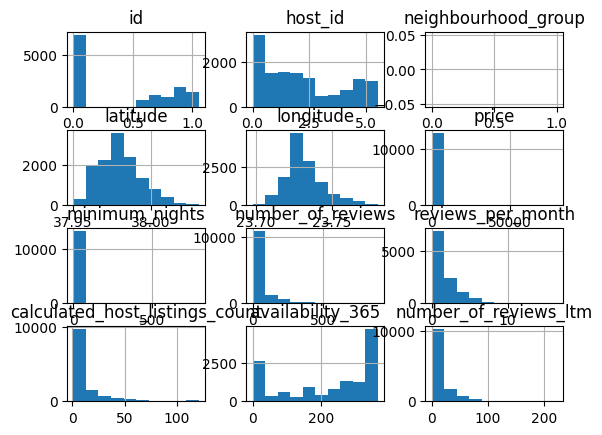

In [11]:
# plotar o histograma das variáveis numéricas
df_analise.hist(  )

### **Q4. Qual a média dos preços de aluguel?**

In [13]:
# ver a média da coluna `price``
df_analise.price.mean()

105.48470661672908

In [16]:
df_analise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13182 entries, 0 to 13181
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13182 non-null  int64  
 1   name                            13182 non-null  object 
 2   host_id                         13182 non-null  int64  
 3   host_name                       13182 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   13182 non-null  object 
 6   latitude                        13182 non-null  float64
 7   longitude                       13182 non-null  float64
 8   room_type                       13182 non-null  object 
 9   price                           12816 non-null  float64
 10  minimum_nights                  13182 non-null  int64  
 11  number_of_reviews               13182 non-null  int64  
 12  last_review                     

### **Q4. Qual a correlação existente entre as variáveis**

In [20]:
# criar uma matriz de correlação
corr = df_analise[['neighbourhood_group','latitude','longitude','price','minimum_nights','number_of_reviews','number_of_reviews']].corr()
# mostrar a matriz de correlação
corr


,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,number_of_reviews
neighbourhood_group,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,NaN,1.000000,0.182678,-0.017174,0.041604,-0.113278,-0.113278
longitude,NaN,0.182678,1.000000,-0.007128,0.022876,-0.100070,-0.100070
price,NaN,-0.017174,-0.007128,1.000000,-0.004891,-0.010364,-0.010364
minimum_nights,NaN,0.041604,0.022876,-0.004891,1.000000,-0.027224,-0.027224
number_of_reviews,NaN,-0.113278,-0.100070,-0.010364,-0.027224,1.000000,1.000000
number_of_reviews,NaN,-0.113278,-0.100070,-0.010364,-0.027224,1.000000,1.000000


<Axes: >

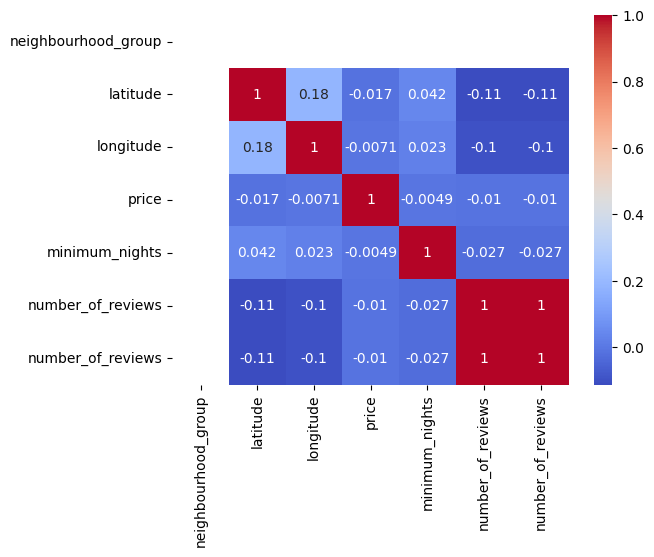

In [19]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, annot=True, cmap='coolwarm')


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [46]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_analise.room_type.value_counts()

room_type
Entire home/apt    11906
Private room        1091
Hotel room           102
Shared room           83
Name: count, dtype: int64

In [60]:
# mostrar a porcentagem de cada tipo de imóvel disponível
qtd_imv = df_analise.room_type.value_counts()/df_analise.shape[0]
for imovel, percent in qtd_imv.items():
  print(f'A porcentagem do imóvel{imovel} é: {percent:2%}%')

A porcentagem do imóvelEntire home/apt é: 90.320134%%
A porcentagem do imóvelPrivate room é: 8.276438%%
A porcentagem do imóvelHotel room é: 0.773782%%
A porcentagem do imóvelShared room é: 0.629646%%


In [52]:
qtd_imv = df_analise.room_type.value_counts()/df_analise.shape[0]


### **Q6. Qual a localidade mais cara do dataset?**



In [80]:
# ver preços por bairros, na média
preco_imoveis = df_analise.groupby('id')['price'].max()
preco_imoveis.sort_values(ascending=False)

id
32463338               80275.0
37231739                8074.0
51342328                8000.0
29173172                8000.0
39386108                8000.0
                        ...   
1026060307974708908        NaN
1028759622294091247        NaN
1031868107051797875        NaN
1039602374317173183        NaN
1043552682242382618        NaN
Name: price, Length: 13182, dtype: float64

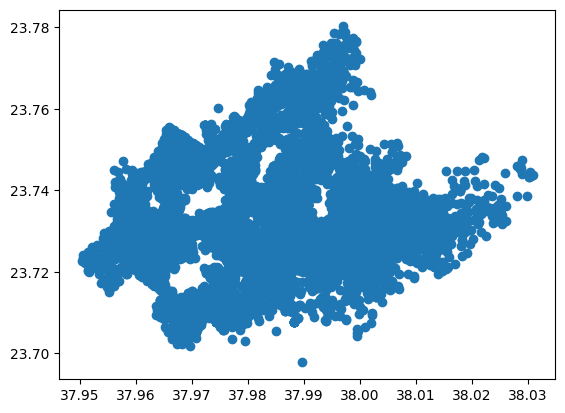

In [73]:
# plotar os imóveis pela latitude-longitude
plt.scatter(df_analise['latitude'], df_analise['longitude'])

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [74]:
# ver a média da coluna `minimum_nights``
df_analise['minimum_nights'].mean()

3.15126687907753

## Conclusões


Com base na tabela do Airbnb analisada, foi possível observar que a cidade de Atenas possui uma vasta oferta de imóveis, totalizando 13.182 listagens distintas. Esses imóveis foram classificados em quatro tipos principais: "Entire home/apt", "Private room", "Hotel room" e "Shared room". Notavelmente, o tipo "Entire home/apt" é predominante, representando 90.32% do total de imóveis listados. O imóvel mais caro identificado possui o ID 32463338. Além disso, ao plotar um gráfico de dispersão com base nas coordenadas de latitude e longitude, foi possível visualizar a distribuição espacial dos imóveis na cidade, revelando informações sobre a sua localização e distância relativa entre eles. Essas análises proporcionam uma compreensão mais abrangente do mercado imobiliário em Atenas, sendo úteis para diversos fins, como planejamento urbano, turismo e investimento.